In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def display(image1,image2):
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    plt.subplot(221)
    plt.imshow(image1,cmap='gray')
    plt.axis('off')
    plt.title('Image 1')

    plt.subplot(222)
    plt.imshow(image2,cmap='gray')
    plt.axis('off')
    plt.title('Image 2')
    plt.show()
    
def get_and_draw_contors(image):
    canny = cv2.Canny(image, 2, 80)
    contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image, contours, -1, (255, 255, 255), 2)
    return contours

def create_mask(image,contours):
    for contour in contours:
        mask = np.zeros(image.shape[:2], np.uint8)
    
        # Draw each contour on mask
        cv2.drawContours(mask, [contour],-1, 255, -1)

        # Apply mask to image
        masked = cv2.bitwise_and(image, image, mask=mask)
        display(mask,masked)
    

In [3]:
#read images
images = []
copy=[]
for file_name in os.listdir('pictures/t2'):
     images.append(cv2.imread('pictures/t2/'+file_name))
     copy.append(cv2.imread('pictures/t2/'+file_name))

In [4]:
# Convert the images to grayscale
gray1 = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY)

#removing the noise

#apply gaussian blur
gray1 = cv2.GaussianBlur(gray1, (7, 7), 0)
gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)
#apply median blur
gray1 = cv2.medianBlur(gray1, 13)
gray2 = cv2.medianBlur(gray2, 11)

In [5]:
contours1 = get_and_draw_contors(gray1)
contours2 = get_and_draw_contors(gray2)

In [6]:
#filtering unwanted contours in first image
filtered_contours1 =[]
for contour in contours1:
    if cv2.contourArea(contour) > 2000:
        filtered_contours1.append(contour)

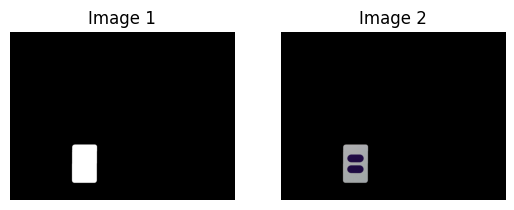

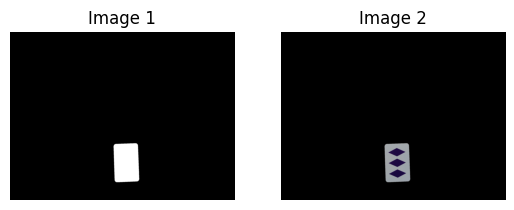

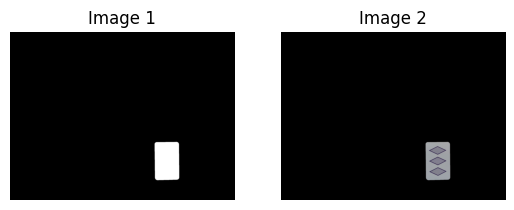

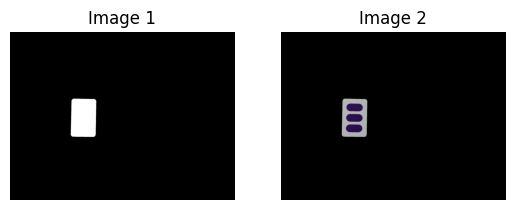

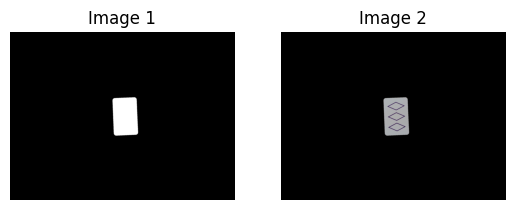

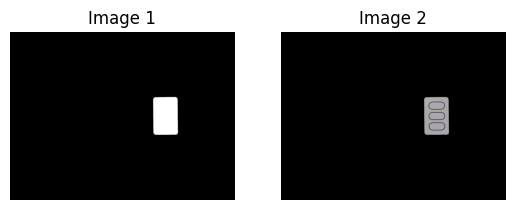

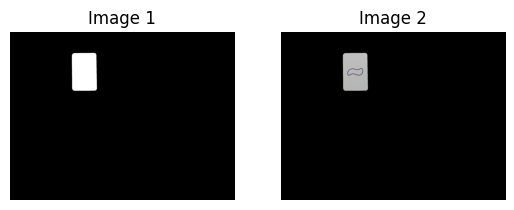

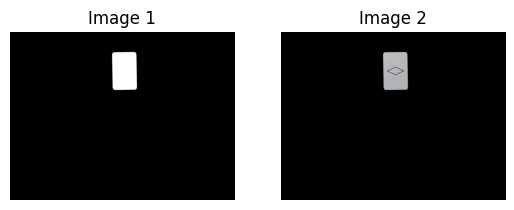

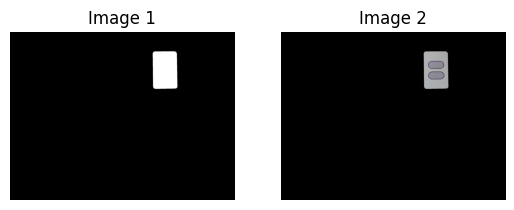

In [7]:
# Create masks and draw each contour alone in first image
create_mask(copy[0],filtered_contours1)

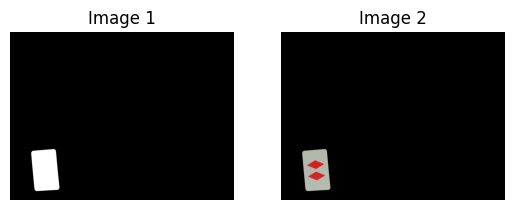

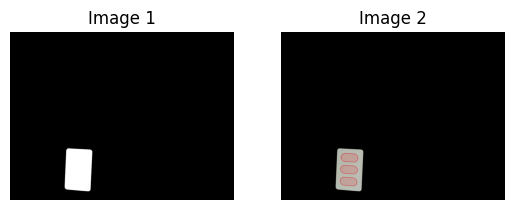

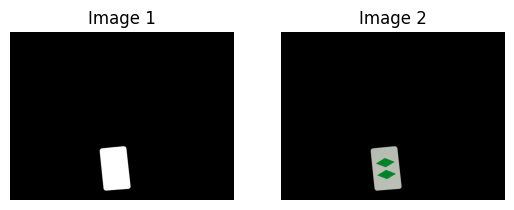

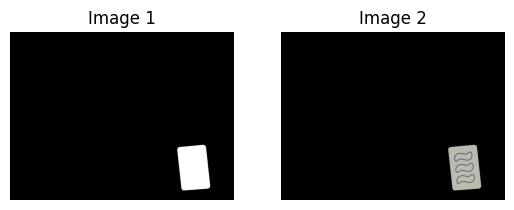

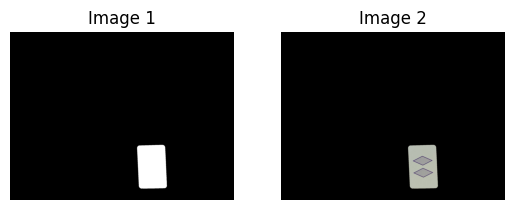

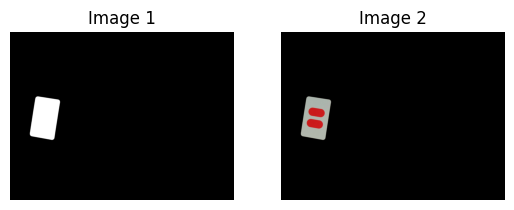

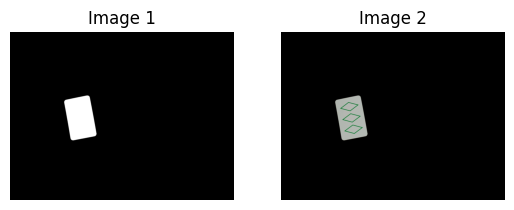

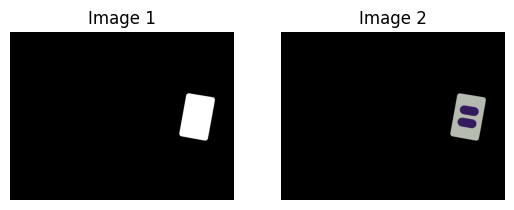

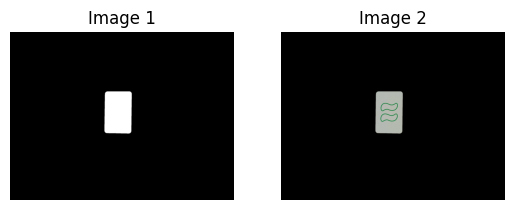

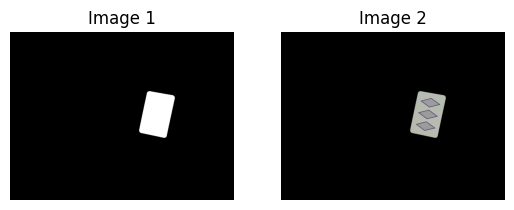

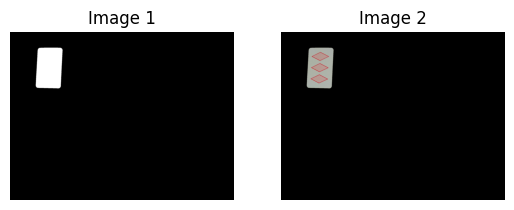

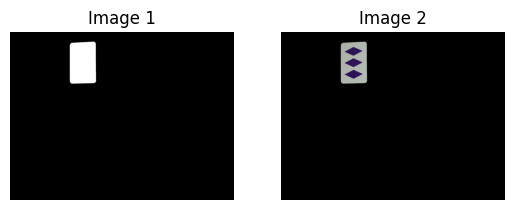

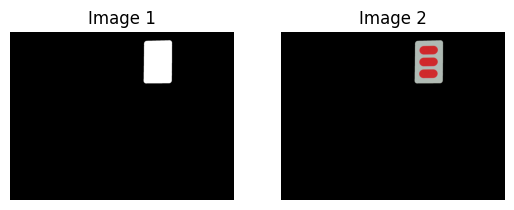

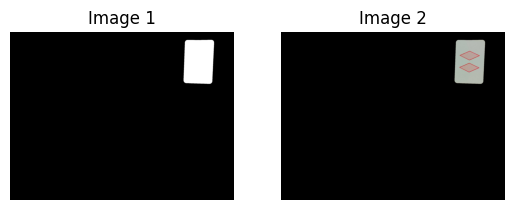

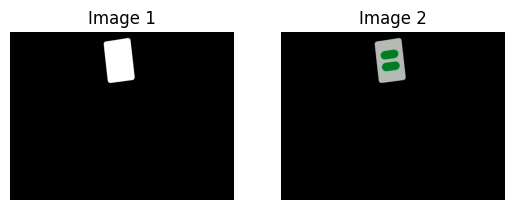

In [8]:
# Create masks and draw each contour alone in second image
create_mask(copy[1],contours2)